# Simple Triple Bucket Hydrology Model
### April 9, 2018

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# Sample Data
#Nt = 100
#dt = 1.0
#P = np.zeros((Nt,1))
#P[19:39] = 4.0
#t = np.arange(1,Nt+1,1)


# Real data import
df = pd.read_csv('bucketData.csv', names=['Year','Month','Day','P','SM2','SM4','SM8','SM20','SM40'], skiprows=1)
# Format a better Date column
P = df['P'].values
t = np.arange(0,len(P),1)
Nt = len(P)
dt = 1.0

In [119]:
print(df)

     Year  Month  Day      P   SM2   SM4   SM8  SM20  SM40
0    2010      1    1  0.000  31.9  37.8  28.3  26.1   9.6
1    2010      1    2  0.000  32.2  37.4  28.7  26.8   9.9
2    2010      1    3  0.000  32.0  36.9  28.1  26.5   9.5
3    2010      1    4  0.000  31.6  36.4  28.2  27.1   9.6
4    2010      1    5  0.000  31.6  36.7  27.7  26.9   9.7
5    2010      1    6  0.000  31.3  36.3  27.8  26.9   9.7
6    2010      1    7  0.000  31.5  36.1  27.7  27.5   9.7
7    2010      1    8  0.000  31.0  30.2  27.7  27.4   9.5
8    2010      1    9  0.000  30.8  20.1  27.5  27.1   9.5
9    2010      1   10  0.000  30.5  17.5  27.4  27.1   9.5
10   2010      1   11  0.000  30.3  22.5  27.0  27.2   9.6
11   2010      1   12  0.000  30.2  30.7  27.1  27.3   9.3
12   2010      1   13  0.000  30.3  33.0  26.7  27.1   9.2
13   2010      1   14  0.000  30.4  34.1  27.0  27.1   9.4
14   2010      1   15  0.000  30.6  33.7  27.3  26.9   9.5
15   2010      1   16  0.000  30.5  33.4  26.9  27.0   9

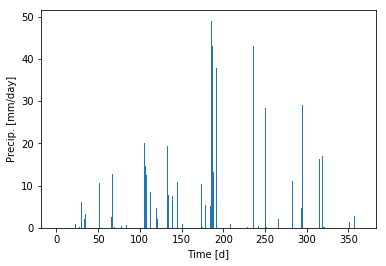

In [120]:
plt.figure(1)
plt.bar(t,P)
plt.ylabel("Precip. [mm/day]")
plt.xlabel("Time [d]")
plt.show()

In [121]:
print(P.shape)
print(t.shape)

(365,)
(365,)


In [124]:
k1 = 0.020  # drainage coefficient in units per day
k2 = 0.015  # drainage coefficient in units per day
k3 = 0.010  # drainage coefficient in units per day
W1_0 = 250.0  # water storage initial condition in mm

# initializing data container for water storage at each time step
W1 = np.zeros(t.shape)
W2 = np.zeros(t.shape)
W3 = np.zeros(t.shape)
# update initial condition for storage
W1[0] = W1_0
W2[0] = W1_0
W3[0] = W1_0

# initialize data container for discharge at each time step
Q1 = np.zeros(t.shape)
Q2 = np.zeros(t.shape)
Qb = np.zeros(t.shape)

# update initial condition for discharge
Q1[0] = k1*W1_0
Q2[0] = k2*W1_0
Qb[0] = k3*W1_0

# main loop for analysis
for i in np.arange(1,Nt,1):
    
    # compute the value of the derivatives
    dW1dt = P[i-1] - k1*W1[i-1]
    dW2dt = k1*W1[i-1] - k2*W2[i-1]
    dW3dt = k2*W2[i-1] - k3*W3[i-1]
    
    
    # compute next value of W
    W1[i] = W1[i-1]+dW1dt*dt
    W2[i] = W2[i-1]+dW2dt*dt
    W3[i] = W2[i-1]+dW3dt*dt
    
    # compute next value of Q
    
    Qb[i] = k3*W3[i]
    
print('done')

done


In [125]:
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(W2[3])

(365,)
(365,)
(365,)
253.39753125


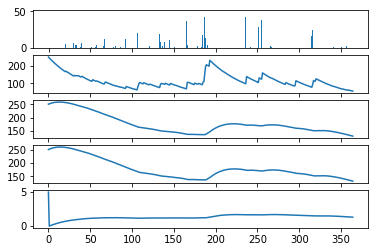

In [126]:
plt.figure(2)
plt.subplot(5,1,1)
plt.bar(t,P)
plt.subplot(5,1,2)
plt.plot(t,W1)
plt.subplot(5,1,3)
plt.plot(t,W2)
plt.subplot(5,1,4)
plt.plot(t,W3)
plt.subplot(5,1,5)
plt.plot(t,Q)
plt.show()